<a href="https://colab.research.google.com/github/jaykay4403/Bayesian-ML/blob/main/M2_6_1_Bonus_Tutorial_jkEdits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(400, 2)
(100, 2)


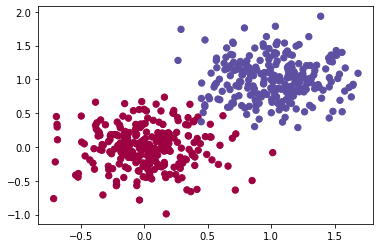

In [6]:
# You might want to use the following packages
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def make_xor(n_points):
    centers = np.array([[0,0],[1,1]])
    labels = np.array([0,1])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.3,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
print(X_train.shape)
print(X_test.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

$f = \sigma(WX + b)$

- $X$: data matrix of a dimension $d \times N$
- $W$, $b$: weight ($k \times d$) and bias ($k \times 1$) of the model (aka model parameters)
- $\sigma$: activation function (=step function in perceptron)


**Goal:** find the optimal $W$ and $b$ that minimize

$\mathcal{L}_\text{MSE} := \mathbb{E}\left( \|f - y\|^2 \right)$

**Strategy:**
1.   Begin with some random initial values of $W$, $b$
2.   Compute $\frac{\partial \mathcal{L}}{\partial W}$ and $\frac{\partial \mathcal{L}}{\partial b}$.
3.   Update $W$, $b$ using gradient decent
4.   Repeat 2~3 for a user-specified number of epochs

**Gradients:** (needs to have 1/N to show average)

$\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{N}(f-y) X^\top$

$\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{N}\sum(f-y)$  

In [9]:
from sklearn.base import BaseEstimator
import numpy as np

class MyPerceptron(BaseEstimator):
  def __init__(self, d_in, d_out):
    # randonly initialize parameters
    self.W = np.random.normal(loc=0, scale=0.01, size=(d_out, d_in))
    self.b = np.random.normal(loc=0, scale=0.01, size=(d_out, 1))

  def fit(self, X, y, epochs, learning_rate):
    for i in range(epochs):
      # Step 1: make prediction (f)
      f = self.forward_pass(X)

      # Step 2: compute the gradient using backwards propagation
      # y = ground truth output, f = model prediction
      # dW = derivative Weight, db = derivation of loss function relative to b
      # often shown as dlW and dlb (derivative loss Weight)
      dW, db = self.backward_pass(X, y, f)
      
      # Step 3: update the model (gradient descent)
      self.W -= learning_rate*dW
      self.b -= learning_rate*db

      # print accuracy to monitor process of epochs - print every 5 epochs
      if i % 5 == 0:
        print('Epoch %d/%d: loss %f - accuracy %f'
              %(i, epochs, self.loss(y, f), self.evaluate(X, y)))

  # implements full model: 𝑓=𝜎(𝑊𝑋+𝑏)
  def forward_pass(self, X):
    Z = np.matmul(self.W, X) + self.b
    f = np.where(Z>=0, 1, 0)
    return f
    
  def backward_pass(self, X, y, f):
    m = y.shape[0]
    df = f - y
    dW = np.dot(df, X.T)/m
    db = np.sum(df, axis=1, keepdims=True)/m
    return dW, db

  def loss(self, y, f):
    m = y.shape[0] # infer size of matrix
    L = np.sum( (f-y)**2 )/m # MSE loss
    return L

  def predict(self, X): 
    f = self.forward_pass(X) # infers perceptron model, returns vector f which is a result of the activation function sigma
    y_hat = np.squeeze(f) # f is y-hat except f has dim 1 x N, but we will squeeze it into a 1 dimensional array with N elements
    return y_hat

  def evaluate(self, X, y):
    m = y.shape[0]
    y_hat = self.predict(X) # infer our model and make predictions
    correct_y = (y_hat == y).astype(int) # count # cases whether prediction == ground truth y

    return sum(correct_y)/m # accuracy = correct # of predictions / total # samples

In [10]:
model = MyPerceptron(2, 1)
model.fit(X_train.T, y_train, epochs=50, learning_rate=0.01)
print("Test Accuracy:", model.evaluate(X_test.T, y_test))

Epoch 0/50: loss 0.982500 - accuracy 0.077500
Epoch 5/50: loss 0.292500 - accuracy 0.727500
Epoch 10/50: loss 0.017500 - accuracy 0.985000
Epoch 15/50: loss 0.017500 - accuracy 0.982500
Epoch 20/50: loss 0.015000 - accuracy 0.987500
Epoch 25/50: loss 0.010000 - accuracy 0.990000
Epoch 30/50: loss 0.010000 - accuracy 0.990000
Epoch 35/50: loss 0.010000 - accuracy 0.990000
Epoch 40/50: loss 0.010000 - accuracy 0.990000
Epoch 45/50: loss 0.010000 - accuracy 0.990000
Test Accuracy: 0.99
